# HuggingFace Transformers

{{ badge }}

HuggingFace is a company that provides state-of-the-art Machine Learning models and tools to help researchers, developers, and practitioners to build, train, and deploy NLP models in a fast and easy way. They offer a wide range of models and tools, including models for sentiment analysis, question answering, text classification, language translation, and more.

One of the key offerings from HuggingFace is the `transformers` library, which is a comprehensive library for state-of-the-art NLP models, including models from leading Machine Learning research organizations such as Google, OpenAI, and Microsoft. The `transformers` library is built on top of the `huggingface_hub` library, which is a platform for managing and sharing Machine Learning models.

With the `transformers` library, you can easily access and use a wide range of NLP models, including BERT, GPT-2, RoBERTa, XLNet, and more. The library also provides pre-trained models for various NLP tasks, including text classification, sentiment analysis, named entity recognition, and more.

Additionally, the `transformers` library provides a pipeline API that makes it easy to perform multiple NLP tasks in a single line of code. The pipeline API allows you to perform text preprocessing, tokenization, and prediction in a single function call, making it easy to build NLP models and perform NLP tasks quickly and efficiently.

Overall, HuggingFace and its libraries, including the `transformers` library and the `huggingface_hub` library, are valuable resources for anyone working in NLP and machine learning. Whether you're a researcher, developer, or practitioner, you'll find the tools and models provided by HuggingFace to be powerful and useful in building and deploying NLP models.

References:
- [HuggingFace](https://huggingface.co/)
- [HuggingFace Transformers](https://huggingface.co/transformers/)
- [HuggingFace Hub](https://huggingface.co/hub/)
- [HuggingFace Transformers Documentation](https://huggingface.co/transformers/index.html)



## Table of Contents <a name="toc"></a>
- [Computer Vision Tasks](#computer-vision)
  - [Image Classification](#image-classification)
  - [Object Detection](#object-detection)
  - [Image Segmentation](#image-segmentation)
- [NLP Tasks](#nlp)
  - [Sentiment Analysis](#sentiment-analysis)
  - [Token Classification](#token-classification)
  - [Text Summarization](#text-summerization)
  - [Chatbots](#chatbot)


In [ ]:
# If you're running this notebook on Colab, run the following cell to install the required libraries
!pip install transformers gradio timm

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import gradio as gr
from transformers import pipeline, Conversation
from PIL import Image  # for image processing
import requests  # for downloading images
import uuid  # for generating unique identifiers

## Introduction to Transformers Pipelines <a name="introduction"></a>
[Back to Top](#toc)

Transformers Pipelines are a high-level API provided by the `transformers` library that make it easy to perform multiple ML tasks with a single function call. The pipelines API allows you to perform text preprocessing, tokenization, and prediction in a single function call, making it easy to build ML models and perform ML tasks quickly and efficiently.

With the pipelines API, you can easily perform tasks such as text classification, sentiment analysis, named entity recognition, question answering, and more, without having to write any code. The pipelines API is designed to be easy to use and is ideal for beginners who are new to ML and machine learning.

In addition to being easy to use, the pipelines API is also highly customizable. You can fine-tune the models provided by the `transformers` library to meet the specific needs of your ML tasks, or you can train your own models from scratch. The pipelines API also supports multiple NLP models, including BERT, GPT-2, RoBERTa and computer vision models, including ResNet, VGG, and more.

Currently available pipelines include:
- Computer Vision Pipeline
  - Image Classification
  - Image Segmentation
  - Object Detection
  - Image Feature Extraction
- NLP Pipelines
  - Text Classification (e.g. sentiment analysis)
  - Token Classification (e.g. named entity recognition)
  - Text Generation (e.g. summarization)
  - Conversation (e.g. chatbots)

For a list of all available pipelines, see the [documentation](https://huggingface.co/transformers/main_classes/pipelines.html).

## Computer Vision Tasks <a name="computer-vision"></a>
[Back to Top](#toc)

### Image Classification <a name="image-classification"></a>
[Back to Top](#toc)

Image classification is a common computer vision task that involves classifying an image. Image classification is useful for identifying the type of an image, which can be used to identify the type of an image.

In [ ]:
# load an image-classification model using pipeline
img_classification = pipeline("image-classification", model="microsoft/resnet-50")

In [4]:
# test the pipeline on a sample image
url = "https://www.thoughtco.com/thmb/OqANUu4U3tNL1Uo2n19uX6PzbM8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/red_kangaroo-24c18ab08dc145f1a798abd4b820390a.jpg"

# image pipelines take one of three types of object: a web URL, a local image path, or PIL image object
img_classification(url)

[{'score': 0.9997605681419373, 'label': 'wallaby, brush kangaroo'},
 {'score': 1.0197682058787905e-05, 'label': 'potpie'},
 {'score': 9.751356628839858e-06,
  'label': 'rock python, rock snake, Python sebae'},
 {'score': 6.465458227467025e-06, 'label': 'modem'},
 {'score': 4.489456387091195e-06, 'label': 'triceratops'}]

In [ ]:
# let's build a Gradio interface for the image classification pipeline
def classify_image(img):
    # we need to convert the image to a PIL image object
    img = Image.fromarray(img)
    # pass the image to the pipeline
    results = img_classification(img)

    # prepare the output for `Label` interface
    labels = {}

    # the pipeline returns a list of dictionaries, each dictionary contains the label and the score
    for result in results:
        labels[result["label"]] = result["score"]

    return labels


gr.Interface(
    classify_image,
    inputs=gr.inputs.Image(label="Upload an image to classify"),
    outputs=gr.outputs.Label(label="Top-5 Probabilities", num_top_classes=5),
).launch()

### Object Detection <a name="object-detection"></a>
[Back to Top](#toc)

Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. With the development of deep learning, object detection has gained lots of improvements and is widely used in many real-world applications, such as self-driving cars, surveillance systems, and object tracking.

In object detection, the goal is to locate the objects and classify them into different categories in the image. There are two main approaches to object detection: region-based object detection and anchor-based object detection. The former approach, such as Faster R-CNN, uses a region proposal network to generate potential object regions and then classifies the objects within these regions. The latter approach, such as YOLO (You Only Look Once), directly predicts the object classes and locations in the image.

Deep learning models, such as Convolutional Neural Networks (CNNs), are commonly used for object detection tasks due to their ability to automatically learn the features and representations of the objects. In the training phase, the model is trained on a large dataset of annotated images, and in the inference phase, the model can be used to detect objects in new images.

Overall, object detection is a crucial task in computer vision and has many real-world applications. With the development of deep learning, object detection has become more accurate and efficient, and is expected to have even more impact in the future.




In [ ]:
# initailize an object-detection pipeline with the tiny variant of YOLOv3
object_detection = pipeline("object-detection", model="hustvl/yolos-tiny")

In [8]:
url = "https://predictivehacks.com/wp-content/uploads/2019/10/cycling001-1024x683.jpg"

# load the image using PIL and requests
image = Image.open(requests.get(url, stream=True).raw)

# pass the image to the pipeline
results = object_detection(image)
results

[{'score': 0.9962812066078186,
  'label': 'car',
  'box': {'xmin': 395, 'ymin': 243, 'xmax': 696, 'ymax': 397}},
 {'score': 0.9625798463821411,
  'label': 'person',
  'box': {'xmin': 267, 'ymin': 188, 'xmax': 431, 'ymax': 527}},
 {'score': 0.9864895343780518,
  'label': 'bicycle',
  'box': {'xmin': 243, 'ymin': 326, 'xmax': 474, 'ymax': 568}}]

'output_48d62739-03f1-492d-a04a-4885663fab06.jpeg'

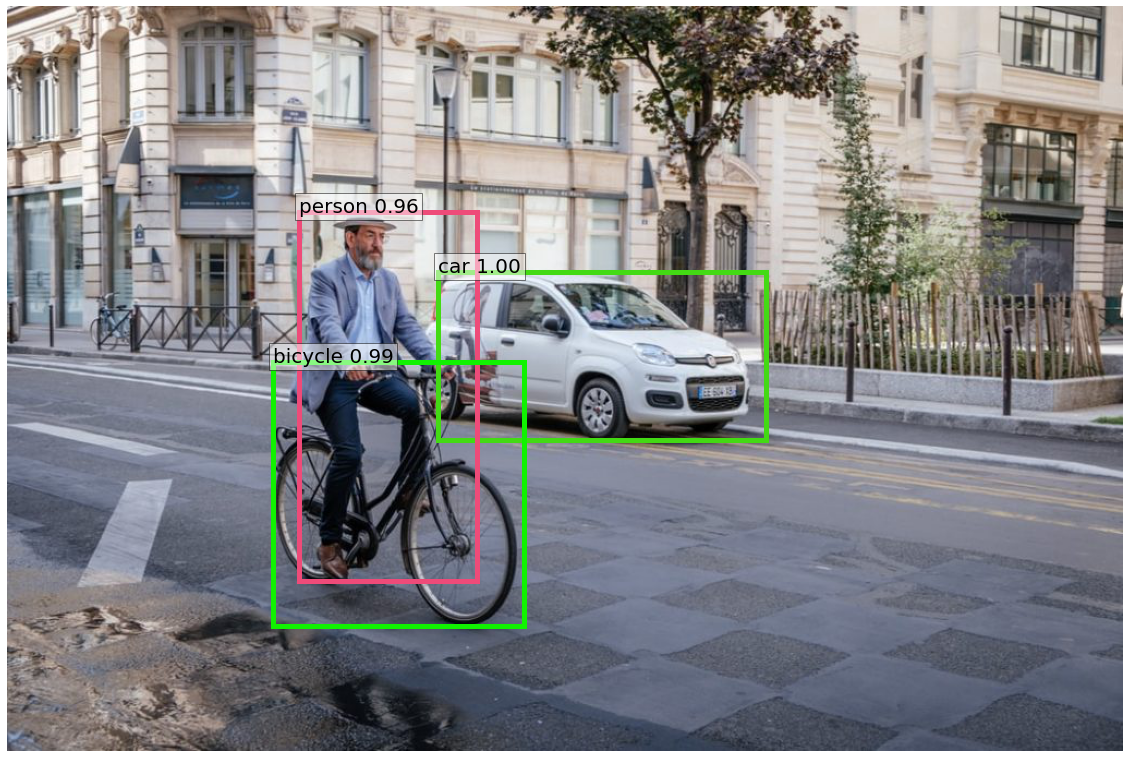

In [14]:
def draw_bounding_boxes(image, results):
    plt.figure(figsize=(20, 20))  # set the figure size
    plt.imshow(image)  # display the image
    ax = plt.gca()  # get the current axes

    for result in results:  # loop through the results
        box = result["box"]

        # get the coordinates of the bounding box
        xmin = box["xmin"]
        ymin = box["ymin"]
        xmax = box["xmax"]
        ymax = box["ymax"]

        # create a rectangle patch
        start_point = (
            xmin,
            ymin,
        )  # the start point is the top-left corner of the bounding box
        width = (
            xmax - xmin
        )  # the width is the difference between the x-coordinates of the top-left and bottom-right corners
        height = (
            ymax - ymin
        )  # the height is the difference between the y-coordinates of the top-left and bottom-right corners

        # create a random color for the bounding box
        random_color = np.random.rand(
            3,
        )

        # create a rectangle patch
        rect = plt.Rectangle(
            start_point,
            width,
            height,  # the start point and the width and height
            fill=False,  # don't fill the rectangle
            linewidth=5,  # set the line width to 5
            color=random_color,  # set the color of the rectangle
        )

        # add the rectangle patch to the axes
        ax.add_patch(rect)

        # add the label and score to the top-left corner of the bounding box
        ax.text(
            xmin,
            ymin,  # the coordinates of the top-left corner
            f"{result['label']} {result['score']:.2f}",  # label and score
            fontsize=20,  # the font size
            color="black",  # the color of the text
            bbox=dict(facecolor="white", alpha=0.5),  # the background color of the text
        )

    plt.axis("off")

    # generate a unique filename
    filename = f"output_{uuid.uuid4()}.jpeg"

    # save the figure to the file
    plt.savefig(filename, bbox_inches="tight", pad_inches=0)
    return filename


draw_bounding_boxes(image, results)

In [ ]:
def detect_objects(image):
    image = Image.fromarray(image)

    results = object_detection(image)

    return draw_bounding_boxes(image, results)


gr.Interface(
    detect_objects, inputs=gr.inputs.Image(), outputs=gr.outputs.Image("filepath")
).launch()

### Image Segmentation <a name="image-segmentation"></a>
[Back to Top](#toc)

Image segmentation is a common computer vision task that involves segmenting an image into different regions. Image segmentation is useful for identifying the different regions of an image, which can be used to identify the different regions of an image.

In [29]:
# load semantic-segmentation pipeline

segmentation = pipeline(model="nvidia/segformer-b0-finetuned-ade-512-512")

/usr/local/lib/python3.8/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/models/segformer/image_processing_segformer.py:102: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [32]:
url = "https://cdn-hhemp.nitrocdn.com/CzTrBAAAQEDiquGqUnZSWpxDsbIQwMVJ/assets/images/optimized/rev-fd9eb96/wp-content/uploads/2021/06/woman-crossing.jpg"

# load the image using PIL and requests
image = Image.open(requests.get(url, stream=True).raw)

# pass the image to the pipeline
results = segmentation(image)
results

[{'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43B6D03DC0>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43B6D03D00>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43A7BE0FD0>},
 {'score': None,
  'label': 'tree',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43A7BE6D90>},
 {'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43A7BE6130>},
 {'score': None,
  'label': 'grass',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43B6CAAE80>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43B6CAA940>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43B6CAA4C0>},
 {'score': None,
  'label': 'plant',
  'mask': <PIL.Image.Image image mode=L size=1000x666 at 0x7F43B6

'output_4f3ed91f-e8ef-42a8-9fac-42239151ca4d.jpeg'

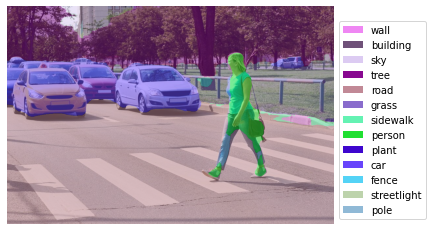

In [33]:
# visualize segmentation results


def visualize_segmentation(image, results):
    # initalize a legend array for the labels and colors
    legend_label = []
    legend_color = []

    plt.figure(figsize=(20, 20))  # set the figure size
    plt.imshow(image)  # show the underlying image

    for result in results:
        mask = result["mask"]

        # convert PIL image to numpy array
        mask = np.array(mask)

        # convert the mask to RGBA (Red, Green, Blue, Alpha)
        mask = np.stack([mask, mask, mask, mask], axis=2)

        # create a random color for the mask
        mask[:, :, 0] = np.random.rand() * 255  # red
        mask[:, :, 1] = np.random.rand() * 255  # green
        mask[:, :, 2] = np.random.rand() * 255  # blue

        # create a rectangle patch using the random color and add it to the legend
        legend_color.append(plt.Rectangle((0, 0), 1, 1, fc=mask[0, 0, :3] / 255))
        # add the label to the legend
        legend_label.append(result["label"])

        # show the mask with colors and transparency
        plt.imshow(mask, alpha=0.5)

    # remove the axes
    plt.axis("off")

    # show the legend
    plt.legend(
        legend_color,  # the colors
        legend_label,  # the labels
        loc="lower left",  # the location of the legend
        bbox_to_anchor=(1, 0),  # the position of the legend (next to the image)
    )

    # generate a unique filename
    filename = f"output_{uuid.uuid4()}.jpeg"

    # save the figure to the file
    plt.savefig(filename, bbox_inches="tight", pad_inches=0)
    return filename


# visualize segmentation results
visualize_segmentation(image, results)

In [ ]:
# create a function for Gradio
def segment_image(image):
    image = Image.fromarray(image)

    results = segmentation(image)

    return visualize_segmentation(image, results)


# create a Gradio interface
gr.Interface(
    segment_image, inputs=gr.inputs.Image(), outputs=gr.outputs.Image("filepath")
).launch(debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## NLP Tasks <a name="nlp"></a>
[Back to Top](#toc)

### Sentiment Analysis <a name="sentiment-analysis"></a>
[Back to Top](#toc)

Sentiment analysis is a common NLP task that involves classifying the sentiment of a given text. Sentiment analysis is useful for understanding the overall sentiment of a given text, which can be used to determine whether the text is positive, negative, or neutral.

In [ ]:
sa_eng = pipeline("sentiment-analysis")  # English sentiment analysis pipeline


def sa_eng_func(text):
    result = sa_eng(text)
    label = result[0]["label"]
    score = result[0]["score"] * 100  # format accuracy as a percentage
    output = f"The sentiment is {label} with an accuracy of {score:.2f}%"
    return output


gr.Interface(
    sa_eng_func,
    inputs=gr.inputs.Textbox(label="Enter your text"),
    outputs=gr.outputs.Textbox(label="Predicted Sentiment"),
).launch()

In [ ]:
# sentiment analysis for Arabic using CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment model for dialectal Arabic
sa_ar = pipeline(
    "sentiment-analysis", model="CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"
)


def sa_ar_func(text):
    result = sa_ar(text)
    label = result[0]["label"]
    score = result[0]["score"] * 100  # format accuracy as a percentage
    output = f"The sentiment is {label} with an accuracy of {score:.2f}%"
    return output


gr.Interface(
    sa_eng_func,
    inputs=gr.inputs.Textbox(label="Enter your text"),
    outputs=gr.outputs.Textbox(label="Predicted Sentiment"),
).launch()

### Token Classification <a name="token-classification"></a>
[Back to Top](#toc)

Token classification is a common NLP task that involves classifying each token in a given text. Token classification is useful for identifying the type of each token in a given text, which can be used to identify named entities, such as people, places, and organizations.

Token classification pipelines take several arguments. An important one is `aggregation_strategy` which determines how the predictions are aggregated. We will use `aggregation_strategy="simple"` for this example. You can read more about the other options in the [documentation](httpshttps://huggingface.co/docs/transformers/main_classes/pipelines#transformers.TokenClassificationPipeline.aggregation_strategy).

In [19]:
# named entity recognition
ner = pipeline(
    model="Jean-Baptiste/roberta-large-ner-english", aggregation_strategy="simple"
)
ner("Hi my name is John and I work at Google in San Fransisco")

[{'entity_group': 'PER',
  'score': 0.9969023,
  'word': ' John',
  'start': 14,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.99446917,
  'word': ' Google',
  'start': 33,
  'end': 39},
 {'entity_group': 'LOC',
  'score': 0.9980526,
  'word': ' San Fransisco',
  'start': 43,
  'end': 56}]

In [20]:
# we'll create a function that converts the output of the pipeline to a format that Gradio can understand using the HighlightedText interface
def prepare_highlighted_text(input, results):
    output = {"text": input, "entities": []}

    for r in results:
        ent = {}
        ent["entity"] = r["entity_group"]
        ent["start"] = r["start"]
        ent["end"] = r["end"]

        output["entities"].append(ent)
    return output

In [21]:
# we'll create a function that takes in a text and returns the highlighted text
def extract_ner(text):
    results = ner(text)
    output = prepare_highlighted_text(text, results)
    return output


gr.Interface(
    fn=extract_ner,
    inputs=gr.inputs.Textbox(label="Sentence"),
    outputs=gr.outputs.HighlightedText(label="Named Entities"),
).launch()

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:240: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [22]:
# now let's do an example on part-of-speech tagging (POS)
pos = pipeline(
    model="vblagoje/bert-english-uncased-finetuned-pos", aggregation_strategy="simple"
)

pos("My name is Ahmed")

[{'entity_group': 'PRON',
  'score': 0.99939275,
  'word': 'my',
  'start': 0,
  'end': 2},
 {'entity_group': 'NOUN',
  'score': 0.99653685,
  'word': 'name',
  'start': 3,
  'end': 7},
 {'entity_group': 'AUX',
  'score': 0.9951696,
  'word': 'is',
  'start': 8,
  'end': 10},
 {'entity_group': 'PROPN',
  'score': 0.9987915,
  'word': 'ahmed',
  'start': 11,
  'end': 16}]

In [23]:
def extract_pos(text):
    results = pos(text)
    outputs = prepare_highlighted_text(text, results)
    return outputs


gr.Interface(
    fn=extract_pos,
    inputs=gr.inputs.Textbox(label="Sentence"),
    outputs=gr.outputs.HighlightedText(label="Part of Speech Tags"),
).launch()

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:240: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Text Summerization <a name="text-summerization"></a>
[Back to Top](#toc)

In [ ]:
summarizer = pipeline("summarization")

In [26]:
article = """
World War II or the Second World War, often abbreviated as WWII or WW2, was a global conflict that lasted from 1939 to 1945. The vast majority of the world's countries, including all of the great powers, fought as part of two opposing military alliances: the Allies (led by the Soviet Union, United Kingdom, United States and China) and the Axis (led by Germany, Japan, and Italy). Many participants threw their economic, industrial, and scientific capabilities behind this total war, blurring the distinction between civilian and military resources. Aircraft played a major role, enabling the strategic bombing of population centres and the delivery of the only two nuclear weapons ever used in war.

World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities, mostly among civilians. Tens of millions died due to genocides (including the Holocaust), starvation, massacres, and disease. In the wake of the Axis defeat, Germany and Japan were occupied, and war crimes tribunals were conducted against German and Japanese leaders.

The causes of World War II are debated, but contributing factors included the Second Italo-Ethiopian War, Spanish Civil War, Second Sino-Japanese War, Soviet–Japanese border conflicts, rise of fascism in Europe and rising European tensions since World War I. World War II is generally considered to have begun on 1 September 1939, when Nazi Germany, under Adolf Hitler, invaded Poland. The United Kingdom and France subsequently declared war on Germany on 3 September. Under the Molotov–Ribbentrop Pact of August 1939, Germany and the Soviet Union had partitioned Poland and marked out their "spheres of influence" across Finland, Estonia, Latvia, Lithuania and Romania. From late 1939 to early 1941, in a series of campaigns and treaties, Germany conquered or controlled much of continental Europe, and formed the Axis alliance with Italy and Japan (with other countries later). Following the onset of campaigns in North Africa and East Africa, and the fall of France in mid-1940, the war continued primarily between the European Axis powers and the British Empire, with war in the Balkans, the aerial Battle of Britain, the Blitz of the United Kingdom, and the Battle of the Atlantic. On 22 June 1941, Germany led the European Axis powers in an invasion of the Soviet Union, opening the Eastern Front, the largest land theatre of war in history.
"""

print("Number of words in article:", len(article.split()))

summarizer(article)

Number of words in article: 390


[{'summary_text': ' World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities . The causes of the conflict are debated, but contributing factors included the Second Italo-Ethiopian War, Second Sino-Japanese War, rise of European tensions and rising European tensions .'}]

In [ ]:
def summarize_text(text):
    results = summarizer(text)
    return results[0]["summary_text"]


gr.Interface(
    summarize_text,
    inputs=gr.inputs.Textbox(label="Article"),
    outputs=gr.outputs.Textbox(label="Summary"),
).launch()

### Chatbot <a name="chatbot"></a>
[Back to Top](#toc)

Chatbots are a common NLP task that involves generating a response to a given text. Chatbots are useful for generating responses to a given text, which can be used to generate responses to a given text.

In Transformers, in addition the pipeline, there is a helper class `Conversation` that stores the history of the conversation. You can use it to keep track of the conversation history and to generate the next response. You can read more about it in the [documentation](https://huggingface.co/docs/transformers/v4.26.1/en/main_classes/pipelines#transformers.Conversation).

In [ ]:
# load a chatbot model using pipeline
chatbot = pipeline(model="microsoft/DialoGPT-large")

#### Conversation <a name="conversation"></a>
[Back to Top](#toc) 

Let's explore the `Conversation` class. 

In [ ]:
# to initalize a new conversation, we need to pass the initial conversation prompt to the model
conversation = Conversation(
    "I'm going to the movies tonight, any suggestion for good movies"
)
conversation

Conversation id: e931d465-d510-4229-aaf8-4b2a5c6f3b12 
user >> I'm going to the movies tonight, any suggestion for good movies 

In [ ]:
# we'll create a function that takes in a conversation and previews its content
def preview_conversation(conversation):
    print("ID:", conversation.uuid)  # unique identifier for the conversation
    print(
        "Current Input:", conversation.new_user_input
    )  # current input to the model (what the user just said)
    past_user_inputs = conversation.past_user_inputs  # all the user inputs so far
    generated_responses = (
        conversation.generated_responses
    )  # all the responses generated by the model so far
    print(
        "Past Conversation:",
        list(
            zip(past_user_inputs, generated_responses)
        ),  # zip the user inputs and responses together
    )


preview_conversation(conversation)

ID: e931d465-d510-4229-aaf8-4b2a5c6f3b12
Current Input: I'm going to the movies tonight, any suggestion for good movies
Past Conversation: []


In [ ]:
# let's pass the conversation to the model and get a response
chatbot(conversation)

# once the chatbot pipeline consumes the conversation, it will update the conversation object with the new response
preview_conversation(conversation)

ID: 88ae857b-6112-4fe6-b28e-5d8254d0b015
Current Input: None
Past Conversation: [("I'm going to the movies tonight, any suggestion for good movies", ' What kind of movies do you like? I like action, comedy, and thrillers.')]


In [ ]:
# we can keep passing the conversation to the model to get more responses
conversation.add_user_input("Can you suggest a comedy instead?")

# before passing the conversation to the model, the newest input will be stored in the `new_user_input` variable
preview_conversation(conversation)

ID: 88ae857b-6112-4fe6-b28e-5d8254d0b015
Current Input: Can you suggest a comedy instead?
Past Conversation: [("I'm going to the movies tonight, any suggestion for good movies", ' What kind of movies do you like? I like action, comedy, and thrillers.')]


In [ ]:
# when we pass the conversation to the model, the `new_user_input` will be consumed and moved to the `past_user_inputs` and the response will be added to the `generated_responses` variable
chatbot(conversation)
preview_conversation(conversation)

ID: 88ae857b-6112-4fe6-b28e-5d8254d0b015
Current Input: None
Past Conversation: [("I'm going to the movies tonight, any suggestion for good movies", ' What kind of movies do you like? I like action, comedy, and thrillers.'), ('Can you suggest a comedy instead?', ' I like comedies, but I also like action and thriller movies as well. What is your favorite movie?')]


#### Gradio Chatbot Demo <a name="gradio-chatbot-demo"></a>
[Back to Top](#toc)

Now we'll build a chatbot interface using Gradio. Gradio includes a `Chatbot` outputs class that makes it easy to build chatbot interfaces.
Another important class is `State` which is a special input/output field that doesn't appear in the interface and allows you to store and retrieve values between function calls. We will use it to store the conversation history.

In [ ]:
# let's build a dummy Gradio interface for a chat bot that just says hello to the user


def greeting_bot(
    input, history
):  # input is the user input, history is the conversation history
    if not history:  # if history is empty, initialize it
        # we'll create a dictionary that stores the user input and the response
        history = {
            "past_user_inputs": [],
            "generated_responses": [],
        }

    # generate response
    response = f"Hello {input}"

    # add input and response to history
    history["past_user_inputs"].append(input)
    history["generated_responses"].append(response)

    # create a list of tuples of the form (user input, response) to display the conversation history
    conversation_history = list(
        zip(history["past_user_inputs"], history["generated_responses"])
    )

    # return the response and the updated history. The history will be passed to the next call of the function
    return conversation_history, history


gr.Interface(
    fn=greeting_bot,
    inputs=[
        gr.inputs.Textbox(label="Name", placeholder="Enter a name here"),
        gr.inputs.State(),
    ],
    outputs=[gr.outputs.Chatbot(label="Gettings"), gr.outputs.State()],
).launch(debug=True)

In [ ]:
# let's create a gradio interface for DialoGPT pipeline
def dialogpt(
    input, history
):  # input is the user input, history is the conversation history stored as a Conversation object
    if not history:  # if history is empty, initialize it
        history = Conversation(
            input
        )  # initialize the conversation with the first user input
    else:  # if history is not empty, add the user input to the conversation
        history.add_user_input(input)

    # pass the conversation to the chatbot pipeline
    chatbot(history)

    # get the conversation history
    user_inputs = history.past_user_inputs
    responses = history.generated_responses

    # zip the user inputs and responses together
    output = list(zip(user_inputs, responses))

    # return the conversation history and the updated conversation object
    return output, history


gr.Interface(
    dialogpt,
    inputs=[gr.inputs.Textbox(label="Your message"), gr.inputs.State()],
    outputs=[gr.outputs.Chatbot(label="DialoGPT"), gr.outputs.State()],
).launch(debug=True)